# **Tame Your Python**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [3]:
# Load data
dataset = fetch_lfw_people(min_faces_per_person=100)
 
N, H, W = dataset.images.shape
X = dataset.data
y = dataset.target
target_names = dataset.target_names

In [4]:
print(target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [5]:
print(dataset.images.shape)
print(dataset.data.shape)
print(dataset.target.shape)

(1140, 62, 47)
(1140, 2914)
(1140,)


In [6]:
print(H*W)

2914


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [0]:
from sklearn.decomposition import TruncatedSVD
n_components = 80
decomposer = TruncatedSVD(n_components=n_components).fit(X_train)

X_train_d = decomposer.transform(X_train)
X_test_d = decomposer.transform(X_test)

In [9]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True)
model.fit(X_train_d, y_train)

Iteration 1, loss = inf
Validation score: 0.504854
Iteration 2, loss = inf
Validation score: 0.524272
Iteration 3, loss = inf
Validation score: 0.660194
Iteration 4, loss = 38.61485418
Validation score: 0.747573
Iteration 5, loss = 24.06446176
Validation score: 0.737864
Iteration 6, loss = 18.49100660
Validation score: 0.766990
Iteration 7, loss = 11.89795329
Validation score: 0.786408
Iteration 8, loss = 11.13935410
Validation score: 0.825243
Iteration 9, loss = 8.09218864
Validation score: 0.805825
Iteration 10, loss = 4.51426572
Validation score: 0.815534
Iteration 11, loss = 4.63631676
Validation score: 0.834951
Iteration 12, loss = 2.47639943
Validation score: 0.825243
Iteration 13, loss = 1.89308690
Validation score: 0.805825
Iteration 14, loss = 1.54381536
Validation score: 0.844660
Iteration 15, loss = 1.12802979
Validation score: 0.825243
Iteration 16, loss = 1.04773064
Validation score: 0.825243
Iteration 17, loss = 0.70350971
Validation score: 0.825243
Iteration 18, loss = 0

MLPClassifier(activation='relu', alpha=0.0001, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1024,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [0]:
y_pred = model.predict(X_test_d)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.97      1.00      0.98        29
  Donald Rumsfeld       0.82      0.69      0.75        13
    George W Bush       0.88      0.88      0.88        48
Gerhard Schroeder       0.80      0.67      0.73        12
       Tony Blair       0.67      0.83      0.74        12

         accuracy                           0.86       114
        macro avg       0.83      0.81      0.82       114
     weighted avg       0.86      0.86      0.86       114



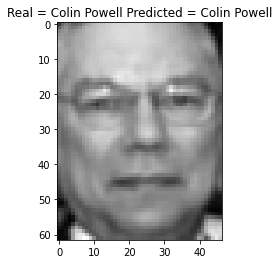

In [12]:
idx = np.random.randint(0,len(y_pred))
plt.figure()
plt.imshow(X_test[idx].reshape((H,W)), cmap = 'gray')
plt.title("Real = " + str(target_names[y_test[idx]]) + " Predicted = " + str(target_names[y_pred[idx]]))
plt.show()

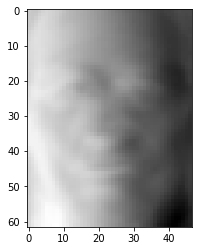

In [13]:
idx = 1
plt.figure()
plt.imshow(decomposer.components_[idx].reshape((H,W)), cmap = 'gray')
plt.show()

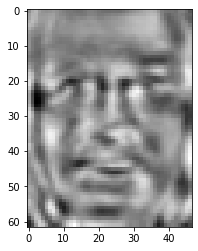

In [14]:
idx = 79
plt.figure()
plt.imshow(decomposer.components_[idx].reshape((H,W)), cmap = 'gray')
plt.show()